In [235]:
%matplotlib notebook

import random
import networkx as nx
import pandas as pd
#import matplotlib
#matplotlib.use('TkAgg')
from matplotlib import pyplot as plt

In [236]:
dataset = pd.read_excel('somos.xlsx', sheet_name='SOMOS(Controle PI)')

In [237]:
dataset

,SOMOS -Planilha Geral de Depósito,SOMOS-LATIPAT,Faculdade/Escola/Centro/Instituto,Departamento,Data Pedido,# pedido/Publicação,Título,Inventores,Num Pedido Trat,Ajuste Num Ped 2,DE PARA SOMOS LATIPAT (1),DE PARA SOMOS LATIPAT (2),OBS
0,BR1020150324944,BR102015032494,Faculdade de Medicina,Departamento de Oftalmologia e Otorrinolaringo...,2015-12-23,BR1020150324944,"“PEPTÍDEOS SINTÉTICOS, MÉTODO E KIT PARA DIAGN...",Eduardo Antonio Ferraz Coelho / Carlos Alberto...,BR1020150324944,1020150324944,BR1020150324944,BR102015032494,NaN
1,BR1020150318618,BR102015031861,Faculdade de Medicina,Departamento de Oftalmologia e Otorrinolaringo...,2015-12-18,BR1020150318618,"“PEPTÍDEOS SINTÉTICOS, MÉTODO E KIT PARA DIAGN...",Eduardo Antonio Ferraz Coelho / Carlos Alberto...,BR1020150318618,1020150318618,BR1020150318618,BR102015031861,NaN
2,C10803807-4,NaN,Faculdade de Medicina,Departamento de Oftalmologia e Otorrinolaringo...,2011-07-29,C1 0803807-4,FILMES POLIMÉRICOS HIDROFÍLICOS PARA LIBERAÇÃO...,André Augusto Gomes Faraco / Juçara Ribeiro Fr...,C10803807-4,C10803807,C10803807,C1080380,NaN
3,PI 0705590-0,BRPI0705590,Faculdade de Medicina,Departamento de Oftalmologia e Otorrinolaringo...,2007-08-07,PI 0705590-0,USO DE COMPOSIÇÃO FARMACÊUTICA CONTENDO CROTOX...,David Toledo Velarde / Geraldo Barros Ribeiro ...,PI0705590-0,PI05590,PI0705590,PI070559,NaN
4,PI 0104539-3,NaN,Faculdade de Medicina,Departamento de Oftalmologia e Otorrinolaringo...,2001-06-21,PI 0104539-3,PROCESSO PARA PURIFICAÇÃO E CARACTERIZAÇÃO DA ...,David Toledo Velarde / Geraldo Barros Ribeiro ...,PI0104539-3,PI04539,PI0104539,PI010453,NaN
5,BR1020140041087,BR102014004108,Faculdade de Medicina,Departamento de Fonoaudiologia,2014-02-21,BR1020140041087,DISPOSITIVO DE ESTIMULAÇÃO DO NISTAGMO OPTOCIN...,Patrícia Cotta Mancini / Antônio Eustáquio de ...,BR1020140041087,1020140041087,BR1020140041087,BR102014004108,NaN
6,BR1020130109711,BR102013010971,Faculdade de Medicina,Departamento de Fonoaudiologia,2013-05-03,BR 1020130109711,DISPOSITIVO PARA REABILITAR A FORÇA E A MOBILI...,Andréa Rodrigues Motta / Estevam Barbosa de La...,BR1020130109711,1020130109711,BR1020130109711,BR102013010971,NaN
7,PI 1005217-8,BRPI1005217,Faculdade de Medicina,Departamento de Fonoaudiologia,2010-12-20,PI 1005217-8,DISPOSITIVO PARA AVALIAR E TREINAR A FORÇA DA ...,Andréa Rodrigues Motta / Cláudio Gomes da Cost...,PI1005217-8,PI05217,PI1005217,PI100521,NaN
8,PI 1005052-3,BRPI1005052,Faculdade de Medicina,Departamento de Fonoaudiologia,2010-08-25,PI 1005052-3,APARELHO PARA AVALIAR E TREINAR A FORÇA DOS LÁ...,Andréa Rodrigues Motta / Cláudio Gomes da Cost...,PI1005052-3,PI05052,PI1005052,PI100505,NaN
9,PI 0802804-4,BRPI0802804,Faculdade de Medicina,Departamento de Fonoaudiologia,2008-06-02,PI 0802804-4,APARELHO FONOAUDIOLÓGICO PARA AVALIAÇÃO DA FOR...,Andréa Rodrigues Motta / Estevam Barbosa de La...,PI0802804-4,PI02804,PI0802804,PI080280,NaN


In [238]:
dataset.columns = ['n', 'latipat1', 'inst', 'dept', 'app_date', 'n_app_pub', 'title', 'inventor', 'n_app_1', 'n_app_2', 'latipat2', 'latipat3', 'obs']

In [239]:
dataset['dept'].replace(to_replace=' Departamento de Produtos Farmacêuticos', 
    value='Departamento de Produtos Farmacêuticos', inplace=True)
dataset['dept'].replace(to_replace=[' VET-DEPTO MED VETER PREVEN', 'VET-DEPTO MED VETER PREVEN'],
    value='Departamento de Medicina Veterinária Preventiva', inplace=True)
dataset['dept'].replace(to_replace=[' ICA-INSTITUTO DE CIENCIAS AGRARIAS', 'ICA-INSTITUTO DE CIENCIAS AGRARIAS'],
    value='Instituto de Ciências Agrárias', inplace=True)
dataset['dept'].replace(to_replace='ARQ-DEPTO TECNOLOGIA DO DESIGN', 
    value='Departamento de Tecnologia do Design', inplace=True)
dataset['dept'].replace(to_replace='COL-SETOR DE PATOLOGIA CLINICA', 
    value='COLTEC - Setor de Patologia Clínica', inplace=True)
dataset['dept'].replace(to_replace='COL-SETOR DE QUIMICA', 
    value='COLTEC - Setor de Química', inplace=True)
dataset['dept'].replace(to_replace='DEPTO FOTOGRAFIA E CINEMA', 
    value='Departamento de Fotografia e Cinema', inplace=True)
dataset['dept'].replace(to_replace='ENG-DEPTO ENG SANITARIA E AMBIENTAL', 
    value='Departamento de Engenharia Sanitária e Ambiental', inplace=True)
dataset['dept'].replace(to_replace='Enfermagem materno infantil e saúde pública', 
    value='Departamento de Enfermagem materno infantil e saúde pública', inplace=True)
dept_list = set(dataset['dept'].to_list())
nodes = list(dept_list)

In [240]:
edges = []
for i, data in dataset.iterrows():
    for j, data2 in dataset.iterrows():
        if (data['n_app_pub'] == data2['n_app_pub']) and (i < j):
            edges.append((nodes.index(data['dept']), nodes.index(data2['dept']), {'label': data['n_app_pub']}))
            #edges.append((nodes.index(data['dept']), nodes.index(data2['dept']), data['n']))
            #print(i, j)
            #print(data['n'], data2['n'])
            #print(data['dept'], data2['dept'])
print(edges)

[(48, 16, {'label': 'BR1020150324944'}), (48, 13, {'label': 'BR1020150324944'}), (48, 16, {'label': 'BR1020150318618'}), (48, 13, {'label': 'BR1020150318618'}), (48, 52, {'label': 'C1 0803807-4'}), (48, 20, {'label': 'C1 0803807-4'}), (37, 33, {'label': 'BR1020140041087'}), (37, 27, {'label': 'BR 1020130109711'}), (37, 33, {'label': 'PI 1005052-3'}), (37, 27, {'label': 'PI 1005052-3'}), (37, 27, {'label': 'PI 0802804-4'}), (37, 27, {'label': 'PI 0303631-6'}), (45, 20, {'label': 'BR1320130338671 (novo) BR1020130338672 (antigo)'}), (3, 52, {'label': 'BR1320120280050'}), (3, 7, {'label': 'BR1320120280050'}), (3, 9, {'label': 'BR1320120280050'}), (10, 35, {'label': 'PI 0001075-8'}), (52, 38, {'label': 'BR1020150318600'}), (52, 16, {'label': 'BR1020150318600'}), (52, 22, {'label': 'BR1020150298315'}), (52, 28, {'label': 'BR1020150282621'}), (52, 26, {'label': 'BR1020150240929'}), (52, 28, {'label': 'BR1020140281711'}), (52, 39, {'label': 'BR1020140259660'}), (52, 38, {'label': 'BR 102013024

In [241]:
#search for repeated links.
edge_list = []
for edge in edges:
    if edge[0] < edge[1]:
        edge_list.append((edge[0], edge[1]))
    else:
        edge_list.append((edge[1], edge[0]))
edge_set = set(edge_list)
edge_set_list = list(edge_set)
print(edge_set_list)
edge_list_of_lists = []
for edge in edge_set_list:
    list_a = []
    for i, edge2 in enumerate(edge_list):
        if edge == edge2:
            list_a.append(i)
    edge_list_of_lists.append(list_a)
edge_count = []
for i, tup in enumerate(edge_set_list):
    edge_count.append((tup, len(edge_list_of_lists[i])))
edge_count_sorted = sorted(list(edge_count), key=lambda kv: kv[1], reverse=True)
print(edge_count_sorted)

[(9, 26), (15, 20), (3, 52), (34, 52), (33, 36), (16, 28), (23, 26), (3, 7), (34, 46), (20, 48), (6, 10), (16, 22), (7, 28), (13, 20), (10, 35), (24, 52), (14, 24), (13, 48), (2, 32), (9, 16), (23, 38), (16, 38), (31, 38), (13, 23), (9, 52), (23, 28), (14, 36), (28, 28), (24, 36), (26, 38), (7, 8), (16, 16), (13, 13), (9, 34), (7, 38), (22, 26), (13, 26), (8, 9), (24, 46), (15, 36), (46, 52), (36, 52), (26, 44), (20, 26), (27, 33), (7, 15), (15, 23), (1, 16), (13, 16), (20, 49), (22, 52), (21, 52), (46, 49), (9, 20), (16, 23), (22, 46), (29, 33), (16, 26), (33, 43), (12, 35), (16, 48), (38, 39), (8, 22), (27, 38), (9, 23), (20, 28), (28, 33), (16, 20), (9, 38), (34, 38), (8, 13), (28, 29), (27, 37), (7, 20), (16, 36), (14, 51), (40, 52), (8, 16), (20, 22), (0, 12), (7, 36), (8, 52), (3, 9), (9, 49), (16, 52), (8, 26), (20, 45), (26, 46), (20, 24), (33, 37), (1, 7), (16, 46), (7, 52), (26, 52), (8, 23), (20, 34), (52, 52), (28, 34), (7, 16), (16, 24), (36, 43), (24, 51), (12, 33), (36, 

In [242]:
node_numbers = []
edges_new = []
for i, tup in enumerate(edges):
    node_numbers.extend((tup[0], tup[1]))
    if random.random() < .5:
        new_tup = (tup[1], tup[0], tup[2])
        edges_new.append(new_tup)
nodes_set = set(node_numbers)

In [243]:
graph = nx.MultiDiGraph()
graph.add_nodes_from(nodes_set)
graph.add_edges_from(edges_new)
degrees = dict(graph.degree())
sorted_degrees = sorted(degrees.items(), key=lambda kv: kv[1], reverse=True)
sorted_degrees

[(52, 52),
 (16, 44),
 (9, 38),
 (20, 24),
 (26, 23),
 (38, 20),
 (8, 18),
 (28, 18),
 (7, 17),
 (13, 17),
 (22, 11),
 (36, 8),
 (24, 7),
 (34, 7),
 (23, 6),
 (46, 6),
 (15, 4),
 (27, 4),
 (33, 4),
 (48, 4),
 (12, 3),
 (37, 3),
 (0, 2),
 (3, 2),
 (35, 2),
 (39, 2),
 (49, 2),
 (1, 1),
 (14, 1),
 (21, 1),
 (29, 1),
 (31, 1),
 (40, 1),
 (43, 1),
 (44, 1),
 (45, 1),
 (51, 1),
 (2, 0),
 (6, 0),
 (10, 0),
 (32, 0)]

In [244]:
first_shell = []
second_shell = []
third_shell = []
count = 0
for tup in sorted_degrees:
    #if count < 1:
    #    first_shell.append(tup[0])
    if count < 9:
        second_shell.append(tup[0])
    else:
        third_shell.append(tup[0]) 
    count +=1
#shells = [first_shell, second_shell, third_shell]
shells = [second_shell, third_shell]
shells

[[52, 16, 9, 20, 26, 38, 8, 28, 7],
 [13,
  22,
  36,
  24,
  34,
  23,
  46,
  15,
  27,
  33,
  48,
  12,
  37,
  0,
  3,
  35,
  39,
  49,
  1,
  14,
  21,
  29,
  31,
  40,
  43,
  44,
  45,
  51,
  2,
  6,
  10,
  32]]

<IPython.core.display.Javascript object>


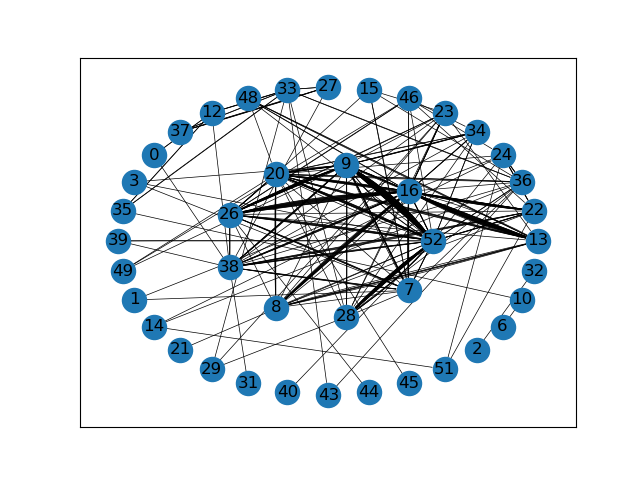

In [252]:
pos = nx.shell_layout(graph, shells)
#pos = nx.spring_layout(graph)
plt.clf()
plt.cla()
fig, ax1 = plt.subplots()
nx.draw_networkx_nodes(graph, pos, ax=ax1)
#nx.draw(graph, with_labels=True, connectionstyle='arc3, rad=0.9', arrowsize=0.001)
for j, edge_list_element in enumerate(edge_list_of_lists):
    for i, element in enumerate(edge_list_element):
        curve = .004*i
        conn_style = 'arc3, rad={}'.format(curve)
        nx.draw_networkx_edges(graph, pos, with_labels=True, edgelist = [edges[element]],
                       connectionstyle=conn_style, arrowsize=0.001, width=.5, ax=ax1)
nx.draw_networkx_labels(graph, pos, ax=ax1)
#nx.draw_networkx_edge_labels(graph, pos)
plt.show()

In [246]:
for element in nodes_set:
    print(element, nodes[element])

0 Departamento de Engenharia Eletrônica
1 Instituto de Ciências Exatas
2 Departamento de Educação Física
3 Departamento de Pediatria
6 Departamento de Medicina Preventiva e Social
7 Departamento de Morfologia
8 Departamento de Análises Clínicas e Toxicológicas
9 Departamento de Fisiologia e Biofísica
10 Departamento de Clínica Médica
12 Departamento de Engenharia Elétrica
13 COLTEC - Setor de Patologia Clínica
14 Departamento de Zootecnia
15 Departamento de Clínica e Cirurgia Veterinaria
16 Departamento de Bioquímica e Imunologia
20 Departamento de Produtos Farmacêuticos
21 COLTEC - Setor de Química
22 Departamento de Microbiologia
23 Departamento de Patologia
24 Departamento de Medicina Veterinária Preventiva
26 Departamento de Parasitologia
27 Departamento de Engenharia de Estruturas
28 Departamento de Odontologia Restauradora
29 Departamento de Clínica, Patologia e Cirurgia Odontológicas
31 Departamento de Saúde Mental
32 Departamento dos Esportes
33 Departamento de Engenharia Mecân

In [247]:
edges2 = []
wd_dict = {}
for tup in edge_count_sorted:
    print(tup)
    edges2.append(tup[0])
    wd_dict[tup[0]] = float(tup[1])/5.0
    print(float(tup[1])/5.0)
wd_dict

((9, 52), 32)
6.4
((13, 16), 20)
4.0
((28, 52), 19)
3.8
((16, 26), 15)
3.0
((9, 26), 11)
2.2
((8, 16), 11)
2.2
((16, 22), 10)
2.0
((20, 52), 9)
1.8
((9, 16), 8)
1.6
((9, 20), 8)
1.6
((16, 20), 6)
1.2
((26, 52), 6)
1.2
((7, 16), 6)
1.2
((7, 9), 6)
1.2
((13, 20), 5)
1.0
((16, 38), 5)
1.0
((20, 26), 5)
1.0
((9, 38), 5)
1.0
((8, 13), 5)
1.0
((8, 20), 5)
1.0
((9, 34), 4)
0.8
((7, 38), 4)
0.8
((22, 52), 4)
0.8
((16, 23), 4)
0.8
((27, 37), 4)
0.8
((16, 52), 4)
0.8
((38, 52), 4)
0.8
((22, 38), 4)
0.8
((7, 26), 4)
0.8
((13, 48), 3)
0.6
((24, 36), 3)
0.6
((26, 38), 3)
0.6
((20, 22), 3)
0.6
((7, 52), 3)
0.6
((12, 33), 3)
0.6
((9, 28), 3)
0.6
((22, 24), 3)
0.6
((20, 36), 3)
0.6
((16, 34), 3)
0.6
((34, 52), 2)
0.4
((33, 36), 2)
0.4
((23, 26), 2)
0.4
((36, 52), 2)
0.4
((27, 33), 2)
0.4
((7, 15), 2)
0.4
((12, 35), 2)
0.4
((16, 48), 2)
0.4
((0, 12), 2)
0.4
((26, 46), 2)
0.4
((33, 37), 2)
0.4
((16, 46), 2)
0.4
((20, 34), 2)
0.4
((52, 52), 2)
0.4
((33, 35), 2)
0.4
((39, 52), 2)
0.4
((22, 22), 2)
0.4
((1

{(9, 52): 6.4,
 (13, 16): 4.0,
 (28, 52): 3.8,
 (16, 26): 3.0,
 (9, 26): 2.2,
 (8, 16): 2.2,
 (16, 22): 2.0,
 (20, 52): 1.8,
 (9, 16): 1.6,
 (9, 20): 1.6,
 (16, 20): 1.2,
 (26, 52): 1.2,
 (7, 16): 1.2,
 (7, 9): 1.2,
 (13, 20): 1.0,
 (16, 38): 1.0,
 (20, 26): 1.0,
 (9, 38): 1.0,
 (8, 13): 1.0,
 (8, 20): 1.0,
 (9, 34): 0.8,
 (7, 38): 0.8,
 (22, 52): 0.8,
 (16, 23): 0.8,
 (27, 37): 0.8,
 (16, 52): 0.8,
 (38, 52): 0.8,
 (22, 38): 0.8,
 (7, 26): 0.8,
 (13, 48): 0.6,
 (24, 36): 0.6,
 (26, 38): 0.6,
 (20, 22): 0.6,
 (7, 52): 0.6,
 (12, 33): 0.6,
 (9, 28): 0.6,
 (22, 24): 0.6,
 (20, 36): 0.6,
 (16, 34): 0.6,
 (34, 52): 0.4,
 (33, 36): 0.4,
 (23, 26): 0.4,
 (36, 52): 0.4,
 (27, 33): 0.4,
 (7, 15): 0.4,
 (12, 35): 0.4,
 (16, 48): 0.4,
 (0, 12): 0.4,
 (26, 46): 0.4,
 (33, 37): 0.4,
 (16, 46): 0.4,
 (20, 34): 0.4,
 (52, 52): 0.4,
 (33, 35): 0.4,
 (39, 52): 0.4,
 (22, 22): 0.4,
 (15, 20): 0.2,
 (3, 52): 0.2,
 (16, 28): 0.2,
 (3, 7): 0.2,
 (34, 46): 0.2,
 (20, 48): 0.2,
 (6, 10): 0.2,
 (7, 28): 0.2,

In [248]:
graph2 = nx.Graph()
graph2.add_nodes_from(nodes_set)
graph2.add_edges_from(edges2)

In [249]:
wd =[]
for edge in graph2.edges:
    wd.append(wd_dict[edge])

In [255]:
pos = nx.shell_layout(graph2, shells)
#pos = nx.spring_layout(graph)
plt.clf()
plt.cla()
fig2, ax2 = plt.subplots()
nx.draw_networkx_nodes(graph2, pos, ax=ax2)
nx.draw_networkx_edges(graph2, pos, width=wd, ax=ax2)
nx.draw_networkx_labels(graph2, pos, ax=ax2)
ax2.()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

AttributeError: 'AxesSubplot' object has no attribute 'show'